# Get data from a spreadsheet
In this exercise, you'll create a data frame from a "base case" Excel file: one with a single sheet of tabular data. The fcc_survey.xlsx file here has a sample of responses from FreeCodeCamp's annual New Developer Survey. This survey asks participants about their demographics, education, work and home life, plus questions about how they're learning to code. Let's load all of it.

pandas has not been pre-loaded in this exercise, so you'll need to import it yourself before using read_excel() to load the spreadsheet.

In [1]:
# Load pandas as pd
import pandas as pd

# Read spreadsheet and assign it to survey_responses
survey_responses = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl')

# View the head of the data frame
(survey_responses.head())

,"FreeCodeCamp New Developer Survey Responses, 2016",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Source: https://www.kaggle.com/freecodecamp/20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,ResourcePluralSight,ResourceSkillCrush,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,SchoolDegree,SchoolMajor,StudentDebtOwe
2,28,0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000
3,22,0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,"some college credit, no degree",NaN,NaN
4,19,0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN


# Load a portion of a spreadsheet
Spreadsheets meant to be read by people often have multiple tables, e.g., a small business might keep an inventory workbook with tables for different product types on a single sheet. Even tabular data may have header rows of metadata, like the New Developer Survey data here. While the metadata is useful, we don't want it in a data frame. You'll use read_excel()'s skiprows keyword to get just the data. You'll also create a string to pass to usecols to get only columns AD and AW through BA, about future job goals.

pandas has been imported as pd.

In [2]:
# Create string of lettered columns to load
col_string = "AD, AW:BA"

# Load data with skiprows and usecols set
survey_responses = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl', 
                        skiprows=2, 
                        usecols=col_string)

# View the names of the columns selected
print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


# Select a single sheet
An Excel workbook may contain multiple sheets of related data. The New Developer Survey response workbook has sheets for different years. Because read_excel() loads only the first sheet by default, you've already gotten survey responses for 2016. Now, you'll create a data frame of 2017 responses using read_excel()'s sheet_name argument in a couple different ways.

pandas has been imported as pd.

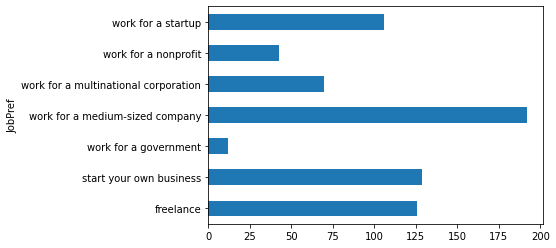

In [3]:
import matplotlib.pyplot as plt
import pandas as pd 

# Create df from second worksheet by referencing its position
responses_2017 = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx',  engine='openpyxl', header=2,
                               sheet_name=1)

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

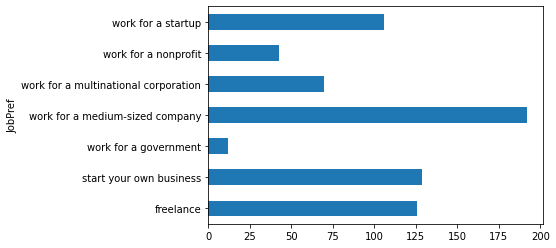

In [4]:
# Create df from second worksheet by referencing its name
responses_2017 = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx',  engine='openpyxl', header=2,
                               sheet_name='2017')

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

# Select multiple sheets
So far, you've read Excel files one sheet at a time, which lets you customize import arguments for each sheet. But if an Excel file has some sheets that you want loaded with the same parameters, you can get them in one go by passing a list of their names or indices to read_excel()'s sheet_name keyword. To get them all, pass None. You'll practice both methods to get data from fcc_survey.xlsx, which has multiple sheets of similarly-formatted data.

pandas has been loaded as pd.

In [5]:
# Load both the 2016 and 2017 sheets by name
all_survey_data = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl',
                                 sheet_name=['2016', '2017'])

# View the data type of all_survey_data
print(type(all_survey_data))

<class 'dict'>


In [6]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl',
                                sheet_name=[0, '2017'])

# View the sheet names in all_survey_data
print(all_survey_data.keys())

dict_keys([0, '2017'])


In [7]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl',
                                sheet_name=None)

# View the sheet names in all_survey_data
print(all_survey_data.keys())

dict_keys(['2016', '2017'])


# Work with multiple spreadsheets
Workbooks meant primarily for human readers, not machines, may store data about a single subject across multiple sheets. For example, a file may have a different sheet of transactions for each region or year in which a business operated.

The FreeCodeCamp New Developer Survey file is set up similarly, with samples of responses from different years in different sheets. Your task here is to compile them in one data frame for analysis.

pandas has been imported as pd. All sheets have been read into the ordered dictionary responses, where sheet names are keys and data frames are values, so you can get data frames with the values() method.

Adding 1000 rows
Adding 1000 rows


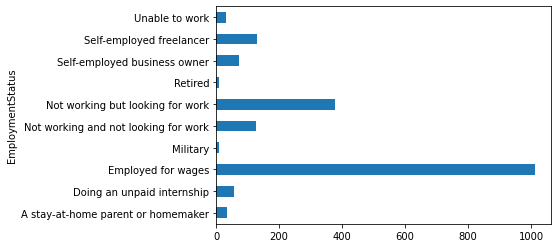

In [8]:
# Create an empty data frame
all_responses = pd.DataFrame()

responses = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl', header=2,
                                 sheet_name=['2016', '2017'])

# Set up for loop to iterate through values in responses
for df in responses.values():
  # Print the number of rows being added
  print("Adding {} rows".format(df.shape[0]))
  # Append df to all_responses, assign result
  all_responses = all_responses.append(df)

# Graph employment statuses in sample
counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
counts.plot.barh()
plt.show()

# Set Boolean columns
Datasets may have columns that are most accurately modeled as Boolean values. However, pandas usually loads these as floats by default, since defaulting to Booleans may have undesired effects like turning NA values into Trues.

fcc_survey_subset.xlsx contains a string ID column and several True/False columns indicating financial stressors. You'll evaluate which non-ID columns have no NA values and therefore can be set as Boolean, then tell read_excel() to load them as such with the dtype argument.

pandas is loaded as pd.

In [9]:
# Load the data
survey_data = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl', header=2)

# Count NA values in each column
survey_data.isna().sum()

Age                   13
AttendedBootcamp       6
BootcampFinish       965
BootcampLoanYesNo    964
BootcampName         968
                    ... 
ResourceUdemy        680
ResourceW3Schools    995
SchoolDegree           8
SchoolMajor          371
StudentDebtOwe       740
Length: 98, dtype: int64

In [10]:

# Set dtype to load appropriate column(s) as Boolean data
survey_data = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl', header=2)

survey_data.dropna()

survey_data['HasDebt'] = survey_data['HasDebt'].astype('bool')

# View financial burdens by Boolean group
print(survey_data.groupby('HasDebt').sum())

             Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
HasDebt                                                                 
False    13343.0              10.0             5.0                1.0   
True     16181.0              27.0            16.0               13.0   

         BootcampRecommend  ChildrenNumber  CodeEventConferences  \
HasDebt                                                            
False                  5.0           109.0                 149.0   
True                  21.0           288.0                 134.0   

         CodeEventDjangoGirls  CodeEventGameJam  CodeEventGirlDev  ...  \
HasDebt                                                            ...   
False                     0.0               0.0               9.0  ...   
True                      0.0               0.0              25.0  ...   

         ResourceLynda  ResourceMDN  ResourceOdinProj  ResourcePluralSight  \
HasDebt                                                    

# Set custom true/false values
In Boolean columns, pandas automatically recognizes certain values, like "TRUE" and 1, as True, and others, like "FALSE" and 0, as False. Some datasets, like survey data, can use unrecognized values, such as "Yes" and "No".

For practice purposes, some Boolean columns in the New Developer Survey have been coded this way. You'll make sure they're properly interpreted with the help of the true_values and false_values arguments.

pandas is loaded as pd. You can assume the columns you are working with have no missing values.

In [11]:
# Load file with Yes as a True value and No as a False value
survey_subset = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl', header=2)
survey_data['HasDebt'] = survey_data['HasDebt'].astype('bool').replace({
                True: 'Yes',
                False: 'No'
            })
survey_data['AttendedBootcamp'] = survey_data['AttendedBootcamp'].astype('bool').replace({
                True: 'Yes',
                False: 'No'
            })
# View the data
print(survey_subset.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  28.0               0.0             NaN                NaN          NaN   
1  22.0               0.0             NaN                NaN          NaN   
2  19.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN  between 100,000 and 1 million   
1                NaN             NaN  between 100,000 and 1 million   
2                NaN             NaN            more than 1 million   
3                NaN             NaN            more than 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  ...  ResourcePluralSight  \
0                   NaN            

# Parse simple dates
pandas does not infer that columns contain datetime data; it interprets them as object or string data unless told otherwise. Correctly modeling datetimes is easy when they are in a standard format -- we can use the parse_dates argument to tell read_excel() to read columns as datetime data.

The New Developer Survey responses contain some columns with easy-to-parse timestamps. In this exercise, you'll make sure they're the right data type.

pandas has been loaded as pd.

In [12]:
# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl', header=2,
                            parse_dates=['Part1StartTime'])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())

0   2016-03-29 21:23:13
1   2016-03-29 21:24:59
2   2016-03-29 21:25:37
3   2016-03-29 21:21:37
4   2016-03-29 21:26:22
Name: Part1StartTime, dtype: datetime64[ns]


# Get datetimes from multiple columns
Sometimes, datetime data is split across columns. A dataset might have a date and a time column, or a date may be split into year, month, and day columns.

A column in this version of the survey data has been split so that dates are in one column, Part2StartDate, and times are in another, Part2StartTime. Your task is to use read_excel()'s parse_dates argument to combine them into one datetime column with a new name.

pandas has been imported as pd.

In [13]:
# Create dict of columns to combine into new datetime column
datetime_cols = {"Part2Start": ["Part2StartTime"]}


# Load file, supplying the dict to parse_dates
survey_data = pd.read_excel('../datasets/fcc-new-coder-survey.xlsx', engine='openpyxl', header=2,
                            parse_dates=datetime_cols)

# View summary statistics about Part2Start
print(survey_data.Part2Start.describe())

count                    1000
unique                    985
top       2016-03-30 01:29:27
freq                        2
first     2016-03-29 21:24:57
last      2016-03-30 09:08:18
Name: Part2Start, dtype: object


# Parse non-standard date formats
So far, you've parsed dates that pandas could interpret automatically. But if a date is in a non-standard format, like 19991231 for December 31, 1999, it can't be parsed at the import stage. Instead, use pd.to_datetime() to convert strings to dates after import.

The New Developer Survey data has been loaded as survey_data but contains an unparsed datetime field. We'll use to_datetime() to convert it, passing in the column to convert and a string representing the date format used.

For more on date format codes, see this reference. Some common codes are year (%Y), month (%m), day (%d), hour (%H), minute (%M), and second (%S).

pandas has been imported as pd.

In [14]:
# Parse datetimes and assign result back to Part2EndTime
survey_data["Part2EndTime"] = pd.to_datetime(survey_data["Part2EndTime"], 
                                             format="%Y%m%d %H:%M:%S")

# Print first few values of Part2EndTime
print(survey_data['Part2EndTime'].head())

0   2016-03-29 21:27:25
1   2016-03-29 21:29:10
2   2016-03-29 21:28:21
3   2016-03-29 21:30:51
4   2016-03-29 21:31:54
Name: Part2EndTime, dtype: datetime64[ns]
